# Linear and Nonlinear driven resonators 

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

### Physical and Numerical parameters 

In [253]:
# System Parameters 
#-----------------------------------
N = 50                    # Number of cavity states
kappa_r = 2 * np.pi * 0.001            # Radiative cavity damping rate (GHz)
kappa_nr= 2 * np.pi * 0.001
kappa= kappa_r+kappa_nr         # Total cavity damping rate (GHz)
Omega =20* kappa_r                    # Rabi drive     
n_th = 0.01                   # Themal bath occupation
delta =2* np.pi * 0.1       #driving-cavity detuning
K=2 * np.pi * 0.005            # Self Kerr (GHz)

### Hamiltonian 

In [244]:
# Operators
#----------
a = destroy(N)
num_a = a.dag()*a

# Hamiltonian in rotative frame 
#------------
H = -delta*(num_a)+Omega/2*(a.dag()+a)     #Harmonic oscillator with coherent driving

# Collapse operators
#-------------------
cc = np.sqrt(kappa*(1.0 + n_th))*a  #Radiative and stimulated (thermal) decay
cp = np.sqrt(kappa*n_th)*a.dag()    #Thermal excitation
c_ops = [cc,cp]

### Solutions

In [256]:
run_time=[]
detuning=np.linspace(-12 , 12 , 301)*kappa
drive= np.linspace(0.1, 25, 31) * kappa_r 
ss='direct' #,'eigen','power','iterative-gmres','iterative-bicgstab'
S11_mat=np.zeros(( len(drive),len(detuning)))+1j*np.zeros(( len(drive),len(detuning)))
n_a=np.zeros(( len(drive),len(detuning)))
i=0
j=0
for delta in detuning:
    for Omega in drive:
        #H = -delta*(num_a)+Omega/2*(a.dag()+a)
        H = -delta*(num_a)-K/2*(a.dag()*a.dag()*a*a)+Omega/2*(a.dag()+a)
        rho_ss, info = steadystate(H, c_ops, method=ss,use_precond=True, tol=1e-15, return_info=True)
        n=expect(num_a, rho_ss)
        S11= 1-2*1j*kappa_r/Omega*expect(a, rho_ss) #relation from input-output 
        #print("Partial solution for detuning=", delta/(2*np.pi), "GHz obtained in",info['solution_time'] )
        run_time.append(info['solution_time'])
        S11_mat[j,i]=S11
        n_a[j,i]=n
        j+=1
    j=0
    i+=1     
    
print('Running time for dimension', N, " Hilber space =", np.sum(run_time))

Running time for dimension 50  Hilber space = 63.620166301727295


### Plots

Text(0, 0.5, 'Photon Number')

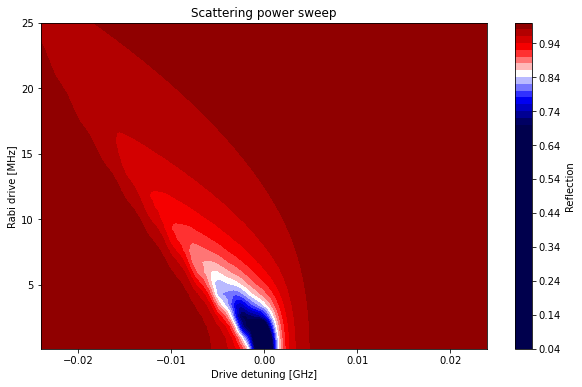

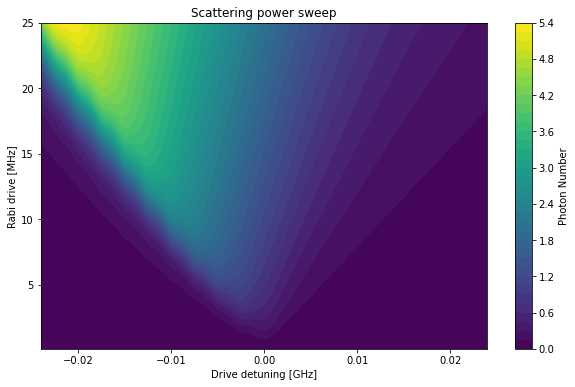

In [262]:
plt.figure(figsize=(10,6))
plt.contourf(detuning/(2 *np.pi),1e3* drive/(2 *np.pi),np.abs(S11_mat), levels=50, vmin=0.7, vmax=1.0, cmap='seismic')
plt.xlabel("Drive detuning [GHz]");
plt.ylabel("Rabi drive [MHz]");
plt.title("Scattering power sweep");
cbar = plt.colorbar()
cbar.ax.set_ylabel('Reflection')

plt.figure(figsize=(10,6))
plt.contourf(detuning/(2 *np.pi),1e3* drive/(2 *np.pi),n_a, levels=50)
plt.xlabel("Drive detuning [GHz]");
plt.ylabel("Rabi drive [MHz]");
plt.title("Scattering power sweep");
cbar = plt.colorbar()
cbar.ax.set_ylabel('Photon Number')

### Cuts plots 

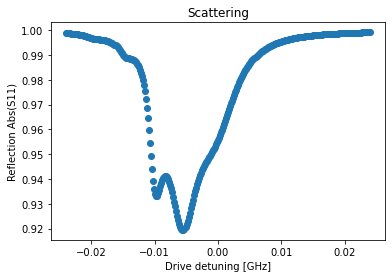

In [252]:
plt.figure()
plt.scatter(detuning/(2 *np.pi), np.abs(S11_mat)[8,:])
plt.xlabel("Drive detuning [GHz]");
plt.ylabel("Reflection Abs(S11)");
plt.title("Scattering");

